In [27]:
import cv2
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [44]:
def homomorphic_filter(img, sigma, alpha, gamma_h, gamma_l, c):
    """
    sigma 为高斯滤波阈值
    """
# 将图像转换为灰度图像并进行归一化
    gray_img = img.astype('float') / 255.0
    
    # 对灰度图像进行对数变换
    log_img = np.log(gray_img + 1.0)
    
    # 获取灰度图像的尺寸和网格
    rows, cols = gray_img.shape
    M, N = np.meshgrid(np.arange(cols), np.arange(rows))
    
    # 计算频率域的中心点
    centerX = int(cols / 2)
    centerY = int(rows / 2)
    
    # 计算频率域的距离矩阵
    D_uv = (M - centerX) ** 2 + (N - centerY) ** 2
    
    # 计算高斯滤波器响应
    gaussian = np.exp(-c * (D_uv / (sigma ** 2)))
    # H_uv = (gamma_h - gamma_l) * (1 - gaussian)
    
    # 将高斯滤波器响应应用到频率域中的对数图像上
    filtered_log = gaussian * fftpack.fft2(log_img)
    
    # 将频率域中的滤波结果转换回空间域
    filtered = np.real(fftpack.ifft2(np.exp(fftpack.ifftshift(filtered_log))))
    
    # 提取高频信息，并将其与低频信息合并
    highpass = alpha * (gray_img - filtered) + filtered
    
    # 对增强后的图像进行映射，并限制像素值在0到1之间
    filtered_image = (gamma_h - gamma_l) * (highpass - np.min(highpass)) / (np.max(highpass) - np.min(highpass)) + gamma_l
    filtered_image = filtered_image.clip(0, 1)
    
    # 将像素值映射回0到255之间，并返回uint8数据类型的图像
    filtered_image = (filtered_image * 255).astype('uint8')
    return filtered_image

In [45]:
img = cv2.imread('./HF.jpg', 0)
filtered = homomorphic_filter(img, sigma=5, alpha=1.0, gamma_h=2.0, gamma_l=0.5, c=10)

In [46]:
filtered

array([[150, 150, 150, ..., 135, 135, 135],
       [150, 150, 150, ..., 135, 135, 135],
       [150, 150, 150, ..., 135, 135, 135],
       ...,
       [136, 136, 138, ..., 144, 142, 142],
       [136, 136, 136, ..., 144, 142, 142],
       [136, 136, 138, ..., 145, 142, 141]], dtype=uint8)

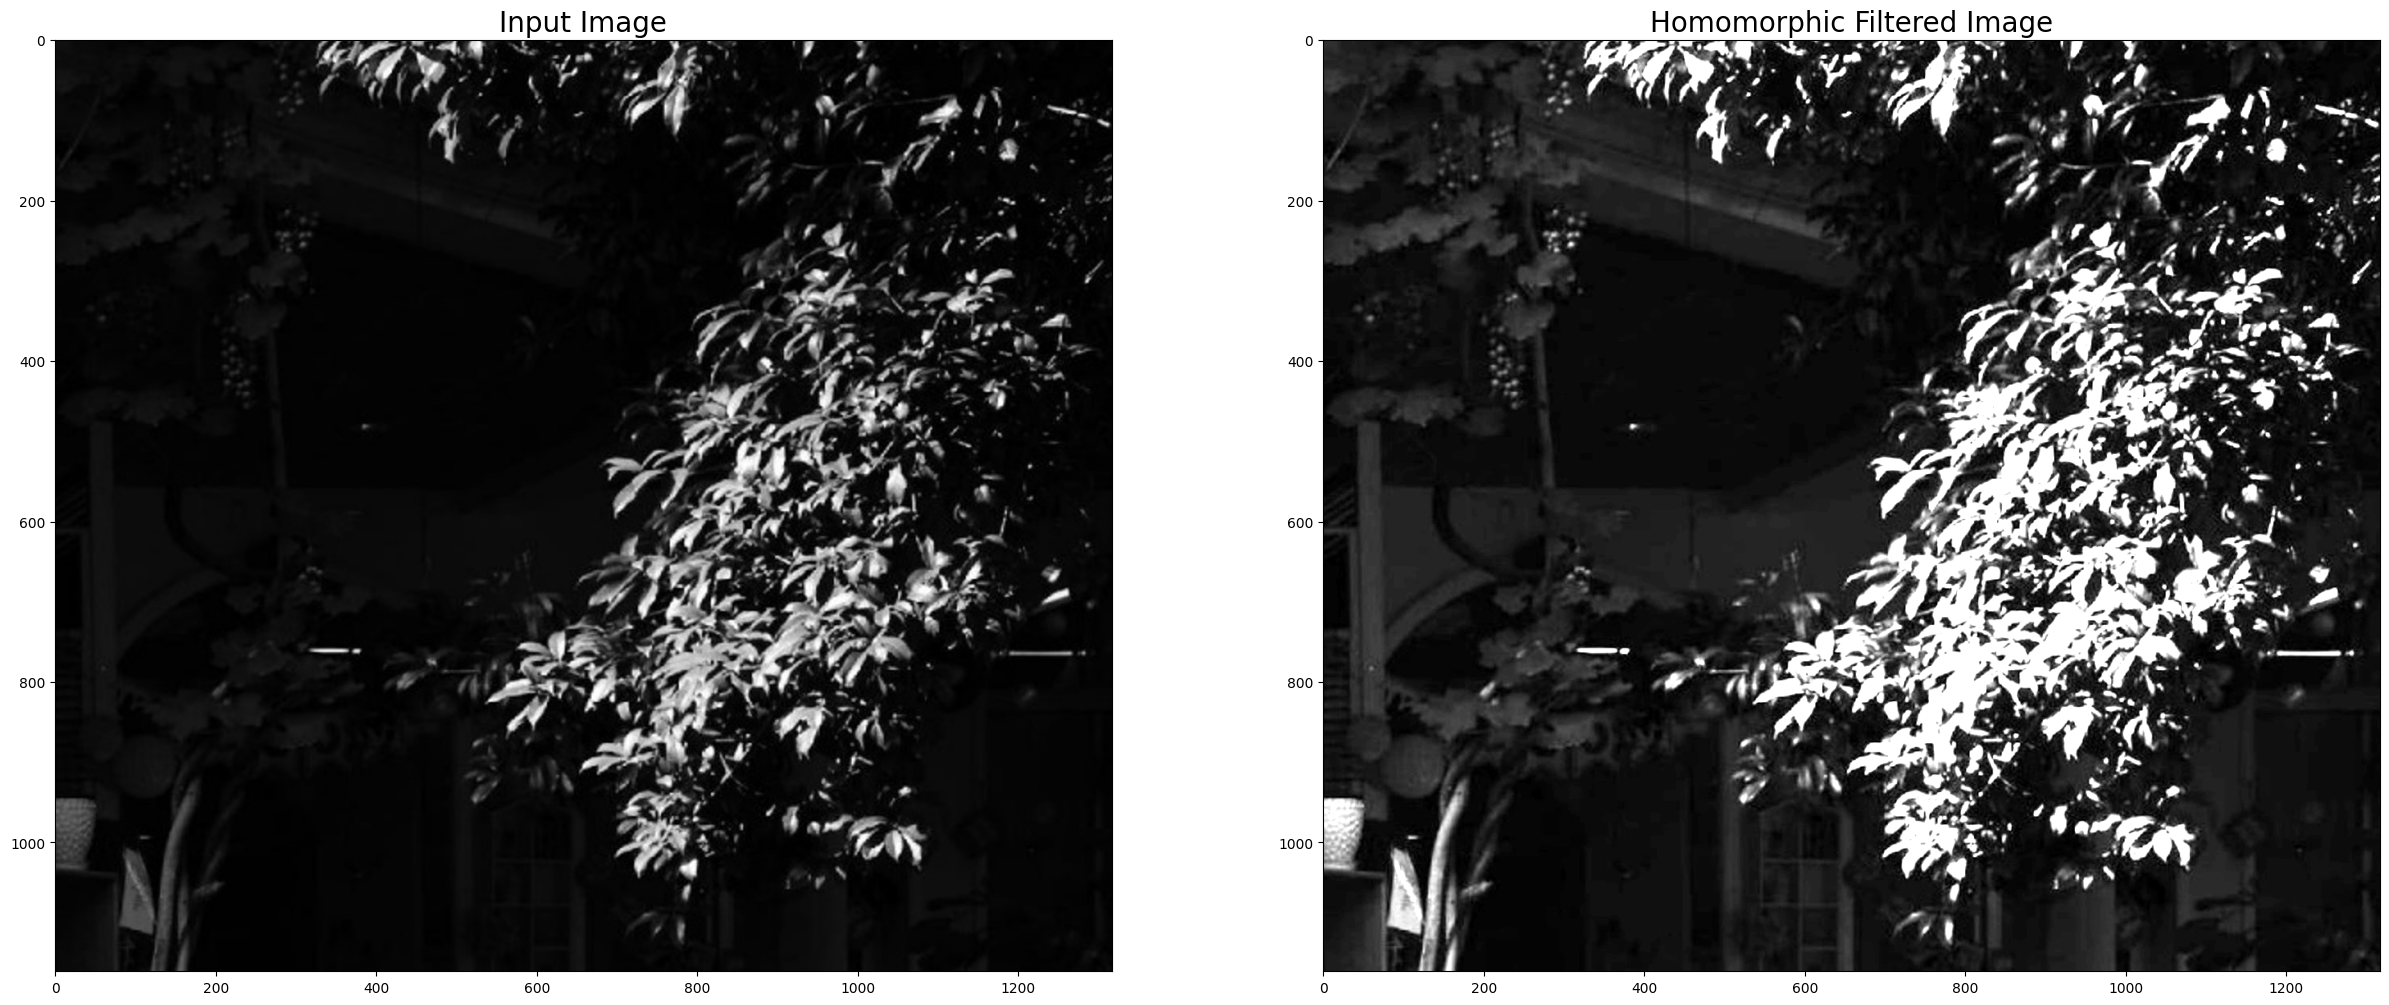

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(30, 30))
# 设置字体
font = fm.FontProperties(size=20)
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Input Image', fontproperties=font)
axs[1].imshow(filtered, cmap='gray')
axs[1].set_title('Homomorphic Filtered Image', fontproperties=font)
plt.show()